In [1]:
import os
import sys
import argparse
sys.path.append("../..")
sys.path.append("../../..")
from lib.logging import print_msg
from lib.read_data import data_read

def load_data(path):
    print(path)
    data = {}
    for pkl_name in sorted(os.listdir(path)):
        if ".pkl" in pkl_name:
            print(pkl_name)
            data[int(pkl_name.split(".pkl")[0])] = data_read(path, pkl_name)
    return data

result_path = "../../workload_manage/five_workloads/result"

data = {}

for workload_name in sorted(os.listdir(result_path)):
    print(workload_name)
    if workload_name.startswith("workload"):
        data[workload_name] = {}


        for run_name in ["bf", "gd"]:
            if run_name == "gd":
                result_search_path_temp = os.path.join(result_path, workload_name, run_name)
                for timeout_name in sorted(os.listdir(result_search_path_temp)):
                    if "_" in timeout_name:
                        result_search_path = os.path.join(result_search_path_temp, timeout_name)
                        data[workload_name][f"gd_{timeout_name}"] = load_data(result_search_path)
            else:
                result_search_path = os.path.join(result_path, workload_name, run_name)
                data[workload_name][run_name] = load_data(result_search_path)

workload_1
../../workload_manage/five_workloads/result/workload_1/bf
10.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/bf 10.pkl
[success]
12.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/bf 12.pkl
[success]
14.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/bf 14.pkl
[success]
2.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/bf 2.pkl
[success]
22.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/bf 22.pkl
[success]
24.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/bf 24.pkl
[success]
28.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/bf 28.pkl
[success]
4.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/bf 4.pkl
[success]
6.pkl
[load output] ../../workload_manage/five_workloads/result/workload_1/bf 6.pkl
[success]
8.pkl
[load output] ../../workload_manage/five_workloads/result/workload_

gd_5_5
gd_5_5
gd_5_5
gd_5_5
gd_5_5
bf
bf
bf
bf
bf


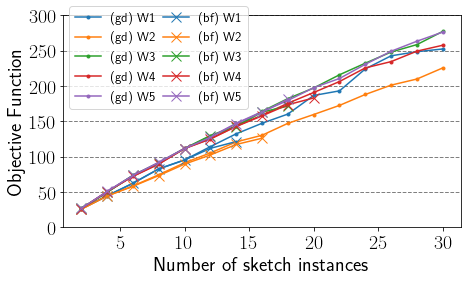

In [2]:

from statistics import median

import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['hatch.linewidth'] = 0.1
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
width = 0.1

markerst1 = 's'
markerst2 = 'p'
markerst3 = '^'
markerst4 = '*'
markerst5 = '|'

fig, ax = plt.subplots(figsize=(6.6, 4))

for run_name in ["gd_5_5", "bf"]:
    for workload in ["workload_1", "workload_2", "workload_3", "workload_4", "workload_5"]:
    # for workload in ["workload_3"]:
    # for run_name in ["bf", "gd_0_0", "gd_5_5"]:
        print(run_name)
        # print(workload)
        key_list = sorted(data[workload][run_name].keys())
        # print(key_list)
        plot_data = []
        actual_key_list = []
        min_list = []
        max_list = []
        for key in key_list:
            list_data = data[workload][run_name][key]["avg_time"]
            if len(list_data) > 10:
                actual_key_list.append(key)
                avg_resource = data[workload][run_name][key]["avg_resource"]["after"]
                plot_data.append(sum(avg_resource))

        if workload == "workload_1":
            workload_name = "W1"
            color = "C0"
        if workload == "workload_2":
            workload_name = "W2"
            color = "C1"
        if workload == "workload_3":
            workload_name = "W3"
            color = "C2"
        if workload == "workload_4":
            workload_name = "W4"
            color = "C3"
        if workload == "workload_5":
            workload_name = "W5"
            color = "C4"

        if run_name == "bf":
            label = f"(bf) {workload_name}"
            marker = "x"
            markersize=10
        elif run_name == "gd_5_5":
            label = f"(gd) {workload_name}"
            marker = "."
            markersize=6
        else:
            label = f"(gd0) {workload_name}"
            marker = markerst3
        ax.plot(actual_key_list, plot_data, label=label, color=color, marker=marker, markersize=markersize)
        # print(plot_data)
        # ax.errorbar(actual_key_list, plot_data, label=label, color=color, marker=marker, yerr=[min_list, max_list])
        # ax.errorbar(actual_key_list, max_list, label=label, color=color)
        # print("avg", plot_data)
        # print("max", max_list)
        # break
    # break

key_list = [i*2 for i in range(1, 16)]

ax.tick_params(axis='y', labelsize=20)
# ax.set_xticks(key_list)
# ax.set_xticklabels(key_list, fontsize=20)
plt.xticks(fontsize=20)
ax.set_xlabel('Number of sketch instances', fontsize=20)

# plt.yscale("log")
ax.set_ylim([0, 300])
ax.set_ylabel('Objective Function', fontsize=20)

from matplotlib.ticker import MultipleLocator
ax.yaxis.set_major_locator(MultipleLocator(50))

plt.legend(bbox_to_anchor=(0.24, 0.8), loc="center", fontsize=13, ncol=2, columnspacing=0.5)
plt.grid(color='gray', linestyle='--', linewidth=1, axis='y')
fig.tight_layout()
plt.savefig("greedy_obj_func.pdf")
plt.show()

/Users/hnamkung/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:81: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.


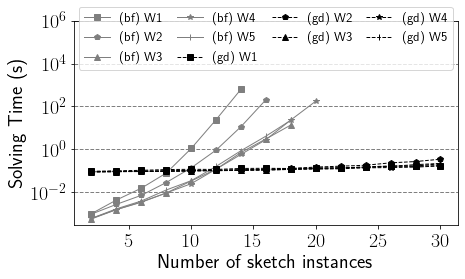

In [13]:

from statistics import median

import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['hatch.linewidth'] = 0.1
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
width = 0.1

markerst1 = 's'
markerst2 = 'p'
markerst3 = '^'
markerst4 = '*'
markerst5 = '|'

fig, ax = plt.subplots(figsize=(6.6, 4))

for run_name in ["bf", "gd_5_5"]:
    for workload in ["workload_1", "workload_2", "workload_3", "workload_4", "workload_5"]:
        # print(workload)
        key_list = sorted(data[workload][run_name].keys())
        # print(key_list)
        plot_data = []
        actual_key_list = []
        min_list = []
        max_list = []
        for key in key_list:
            list_data = data[workload][run_name][key]["avg_time"]
            if len(list_data) > 10:
                actual_key_list.append(key)
                plot_data.append(median(list_data))
                max_list.append(max(list_data) - median(list_data))
                min_list.append(median(list_data) - min(list_data))
                # print(key, len(list_data), min(list_data), median(list_data), max(list_data))
        if workload == "workload_1":
            workload_name = "W1"
            marker = markerst1
        if workload == "workload_2":
            workload_name = "W2"
            marker = markerst2
        if workload == "workload_3":
            workload_name = "W3"
            marker = markerst3
        if workload == "workload_4":
            workload_name = "W4"
            marker = markerst4
        if workload == "workload_5":
            workload_name = "W5"
            marker = markerst5

        if run_name == "bf":
            label = f"(bf) {workload_name}"
            color = "C17"
            linestyle = '-'
        elif run_name == "gd_5_5":
            label = f"(gd) {workload_name}"
            color = "black"
            linestyle = '--'
        else:
            label = f"(gd0) {workload_name}"
            color = "C2"
        ax.plot(actual_key_list, plot_data, label=label, color=color, marker=marker, linestyle=linestyle, linewidth=1)
        # ax.errorbar(actual_key_list, plot_data, label=label, color=color, marker=marker, yerr=[min_list, max_list])
        # ax.errorbar(actual_key_list, max_list, label=label, color=color)
        # print("avg", plot_data)
        # print("max", max_list)
        # break
    # break

key_list = [i*2 for i in range(1, 16)]

ax.tick_params(axis='y', labelsize=20)
# ax.set_xticks(key_list)
# ax.set_xticklabels(key_list, fontsize=20)
plt.xticks(fontsize=20)
ax.set_xlabel('Number of sketch instances', fontsize=20)

plt.yscale("log")
ax.set_ylim([0, 1000000])
ax.set_ylabel('Solving Time (s)', fontsize=20)

plt.legend(bbox_to_anchor=(0.5, 1.1), loc="upper center", fontsize=13, ncol=4, columnspacing=1)
plt.grid(color='gray', linestyle='--', linewidth=1, axis='y')
fig.tight_layout()
plt.savefig("greedy_time.pdf")
plt.show()

